# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import math
import csv

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

#List of traffic sign labels names
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, infile)
    traffic_sign_labels = [rows[1] for rows in reader]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

Let's plot 10 sequential images starting randomly somewhere in the training split..



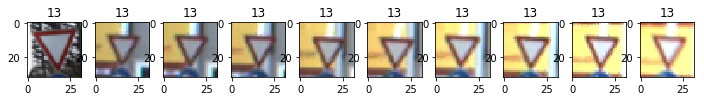

Now, let's visualize the reprentation of each label in all three splits


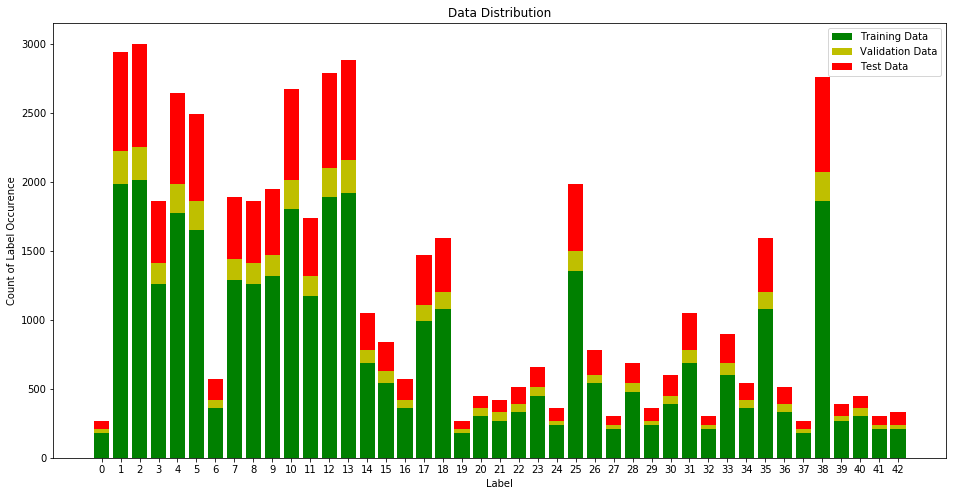

Let's quantify which labels need to be augmented by setting the threshold to be 1250 training samples

The following 30 labels have less than 1250 training samples and need to be augmented:

[0, 6, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42]


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import itertools
from collections import Counter

# Visualizations will be shown in the notebook.
%matplotlib inline

#Determine count of each label in splits
train_set = Counter(y_train)
valid_set = Counter(y_valid)
test_set = Counter(y_test)

print("Let's plot 10 sequential images starting randomly somewhere in the training split..\n")

index = random.randint(0, len(X_train))
n_images = 10
image = X_train[index:index+n_images]
image_labels = y_train[index:index+n_images]
plt.figure(figsize=(12,1))
for i in range(n_images):
    plt.subplot(1,n_images,i+1)
    plt.imshow(image[i])
    plt.title(y_train[index+i])
    #print('Image Labels:', y_train[index+i], "-", traffic_sign_labels[y_train[index+i]])
plt.show()

#Plot histogram of labels in each set
print("Now, let's visualize the reprentation of each label in all three splits")
plt.figure(figsize=(16,8))
plt.title('Data Distribution')
train_bar = plt.bar(range(len(train_set)), train_set.values(), color = 'g')
valid_bar = plt.bar(range(len(valid_set)), valid_set.values(), color = 'y', bottom = train_set.values())
test_bar = plt.bar(range(len(test_set)), test_set.values(), color = 'r', bottom = (train_set + valid_set).values())

plt.xticks(range(len(train_set)), train_set.keys())
plt.xlabel('Label')
plt.ylabel('Count of Label Occurence')
plt.legend([train_bar, valid_bar, test_bar], ['Training Data', 'Validation Data', 'Test Data'])
plt.show()

n_threshold = 1250
print("Let's quantify which labels need to be augmented by setting the threshold to be {:d} training samples\n"
      .format(n_threshold))
#Identify which labels need to be augmented
labels_to_augment = []
for key in train_set.keys():
    if(train_set[key] < n_threshold):
        labels_to_augment.append(key)
print("The following {:d} labels have less than {:d} training samples and need to be augmented:\n"
      .format(len(labels_to_augment), n_threshold))
print(labels_to_augment)

#Plot an image given a label
#label2plot = 28
#images2plot = X_train[np.where(y_train == label2plot)]
#random_index = np.random.randint(0, images2plot.shape[0])
#print('Image Label:', label2plot, "-", traffic_sign_labels[label2plot])
#fig = plt.figure(figsize=(1,1))
#fig = plt.imshow(images2plot[random_index])

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Declare pre-processing functions

from tqdm import tqdm
from skimage import transform
import cv2

#Covert RGB image to grayscale
def grayscale(img_set):
    gray_img_set = []
    for img in img_set:
            gray_img_set.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    return gray_img_set

#Perform histogram equalization using basic algorithm on grayscale images
def equalize(img_set):
    equal_img_set = []
    for img in img_set:
        equal_img_set.append(np.expand_dims(cv2.equalizeHist(img), axis = 2))
    return equal_img_set

#Perform histogram equalization using CLAHE algorithm on grayscale images
def clahe_equalize(img_set):
    clahe_img_set = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    for img in img_set:
        clahe_img_set.append(np.expand_dims(clahe.apply(img), axis = 2))
    return clahe_img_set

#Perform histogram equalization using CLAHE algorithm on RGB->YUV->RGB images
def clahe_equalize_RGB(img_set):
    clahe_RGB_img_set = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    for img in img_set:
        y, u, v = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2YUV))
        y = clahe.apply(y)
        img = cv2.merge((y,u,v))
        img = cv2.cvtColor(img, cv2.COLOR_YUV2RGB)
        clahe_RGB_img_set.append(img)
    return clahe_RGB_img_set

#Merge RGB and gray channels to create image set of depth 4
def merge_channels(img_gray_set, img_RGB_set):
    merge_set = []
    assert(len(img_RGB_set) == len(img_gray_set))
    for img1, img2 in zip(img_gray_set, img_RGB_set):
        img = cv2.merge((img1, img2))
        merge_set.append(img)
    return merge_set

#Normalize image set using mean/std of entire image set
def normalize(img_set, mean, std):
    norm_img_set = []
    for img in tqdm(img_set, total = len(img_set)):
        norm_img_set.append((img - mean)/std)

    return norm_img_set

In [5]:
#Declare augmentation functions

#References: 
#https://github.com/vxy10/ImageAugmentation 
#https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification
#        -using-6355346da2dc
#https://navoshta.com/traffic-signs-classification/
#https://github.com/vxy10/ImageAugmentation


def transform_image(img, rt_range, xlate_range):
    #Define Transformations - rotation and translation
    pixels_x, pixels_y, channels = img.shape    
    rt_angle = np.random.uniform(rt_range) - rt_range/2
    xlate_x = np.random.uniform(xlate_range) - xlate_range/2
    xlate_y = np.random.uniform(xlate_range) - xlate_range/2
    
    M_rot = cv2.getRotationMatrix2D((pixels_y/2, pixels_x/2), rt_angle, 1)
    M_xlate = np.float32([[1,0,xlate_x],[0,1,xlate_y]])
    
    #Transform image
    img = cv2.warpAffine(img, M_xlate, (pixels_y, pixels_x))
    img = cv2.warpAffine(img, M_rot, (pixels_y, pixels_x))
    
    return img

def augment_set(X_data, y_data, labels, threshold, rt_range, xlate_range):
    
    #Declare all variables
    images_dict = {}
    n_imgs = 0 #total # of images that will be perturbed
    pixels_x, pixels_y, channels = X_data.shape[1:4]
    n_aug_imgs = {} #holds # of images that need to be created for each label
    
    #Determine indices of images that need to be augmented and their corresponding labels
    for label in labels:
        images_dict[label] = X_data[np.where(y_data == label)]
        n_aug_imgs[label] =  threshold - images_dict[label].shape[0]
        n_imgs += images_dict[label].shape[0]
        
    #Determine how many perturbed images need to be created for each label to meet the threshold
    print ("# of images available to be perturbed:", n_imgs)
    print("# of images to be created per label", n_aug_imgs)
    print("Total # of images to be created:", sum(n_aug_imgs.values()))
    
    #Create empty array to hold perturbed images
    new_images = np.empty([sum(n_aug_imgs.values()), pixels_x, pixels_y, channels], dtype = np.uint8)
    new_labels = np.empty([sum(n_aug_imgs.values())], dtype = int)
    #print("The shapes of the new arrays are:", new_images.shape, new_labels.shape)
    
    #Loop through labels/image arrays, determine # of perturbations for each image in label then perturb image
    offset = 0
    for label, img_array in tqdm(images_dict.items(), total = len(labels)):
        #print("The image counter has been reset, starting label", label)
        new_img_count = 0
        n_pertubations = math.ceil(n_aug_imgs[label]/images_dict[label].shape[0])
        #print("Labels {:d} has {:d} images and {:d} new images need to be created"
              #.format(label, images_dict[label].shape[0], n_aug_imgs[label]))
        for img_index, img in enumerate(img_array):
            #print("We will create {:d} pertubations for this image.".format(n_pertubations))
                
            #create the desired number of pertubations
            for i in range(n_pertubations):
                #Create the new image and label
                new_images[i+img_index*n_pertubations+offset] = transform_image(img, rt_range, xlate_range)
                #print("The new label is", label, "at index", i+img_index*n_pertubations+offset)
                new_labels[i+img_index*n_pertubations+offset] = label
                new_img_count += 1
                
                if (new_img_count == n_aug_imgs[label]):
                    break
            
            if (new_img_count == n_aug_imgs[label]):
                break
        
        offset += n_aug_imgs[label]
        #print("{:d} new images created for label {:d}".format(new_img_count, label))
        #print("The offset is now {:d}\n".format(offset))
        
        aug_X_data = np.concatenate((X_data, new_images), 0)
        aug_y_data = np.concatenate((y_data, new_labels), 0)


    return (aug_X_data, aug_y_data) 

#Do image mirroring and rotations on labels that are invariant to the operation
def basic_augment(X_data, y_data, xflip, yflip, rot120):    
   
    #Define variables and dictionaries
    xflip_dict = {}
    yflip_dict = {}
    rot_dict = {}
    n_xflip_imgs, n_yflip_imgs, n_rot_imgs = 0, 0, 0
    
    #Setup up rotation matrices
    pixels_x, pixels_y, channels = X_data.shape[1:4]
    M1 = cv2.getRotationMatrix2D((pixels_y/2,pixels_x/2), 120, 1)
    M2 = cv2.getRotationMatrix2D((pixels_y/2,pixels_x/2), 240, 1)
    
    #Populate dictonary with images to be operated on with key = label
    for old_label, new_label in xflip:
        xflip_dict[old_label] = X_data[np.where(y_data == old_label)]
        n_xflip_imgs += xflip_dict[old_label].shape[0]
    
    for old_label, new_label in yflip:
        yflip_dict[old_label] = X_data[np.where(y_data == old_label)]
        n_yflip_imgs += yflip_dict[old_label].shape[0]
  
    for old_label, new_label in rot120:
        rot_dict[old_label] = X_data[np.where(y_data == old_label)]
        n_rot_imgs += rot_dict[old_label].shape[0]
    
    #Create empty arrays to hold new images and their corresponding labels
    xflip_images = np.empty([n_xflip_imgs, pixels_x, pixels_y, channels], dtype = np.uint8)
    xflip_labels = np.empty([n_xflip_imgs], dtype = int)
    yflip_images = np.empty([n_yflip_imgs, pixels_x, pixels_y, channels], dtype = np.uint8)
    yflip_labels = np.empty([n_yflip_imgs], dtype = int)
    rot_images = np.empty([2*n_rot_imgs, pixels_x, pixels_y, channels], dtype = np.uint8)
    rot_labels = np.empty([2*n_rot_imgs], dtype = int)

    #Perform xflips, yflips and 120deg, 240deg rotations
    offset = 0
    for label, img_array in xflip_dict.items():
        if img_array.shape[0] != 0:
            for index, img in enumerate(img_array):
                xflip_images[index+offset] = cv2.flip(img,0)
                xflip_labels[index+offset] = label
            offset += img_array.shape[0]
    
    offset = 0
    for label, img_array in yflip_dict.items():
        if img_array.shape[0] != 0:
            for index, img in enumerate(img_array):
                yflip_images[index+offset] = cv2.flip(img,1)
                yflip_labels[index+offset] = yflip[np.where(yflip[:,0] == label),1][0][0]
            offset += img_array.shape[0]
    
    offset = 0
    for label, img_array in rot_dict.items():
        if img_array.shape[0] != 0:
            for index, img in enumerate(img_array):
                rot_images[index+offset] = cv2.warpAffine(img, M1, (pixels_y,pixels_x))
                rot_images[index+n_rot_imgs+offset] = cv2.warpAffine(img, M2, (pixels_y,pixels_x))
                rot_labels[index+offset] = label
                rot_labels[index+n_rot_imgs+offset] = label
            offset += img_array.shape[0]
    
    #Append arrays and return new training data set
    
    aug_X_data = np.concatenate((X_data, xflip_images, yflip_images, rot_images), 0)
    aug_y_data = np.concatenate((y_data, xflip_labels, yflip_labels, rot_labels), 0)
    print("Number of x-flipped images:", xflip_images.shape[0])
    print("Number of y-flipped images:", yflip_images.shape[0])
    print("Number of rotated images (2x the input):", rot_images.shape[0])
    print("Total # of appended images:", xflip_images.shape[0] + yflip_images.shape[0] + rot_images.shape[0])
    print("Original training data set had {:d} images".format(X_data.shape[0]))
    print("Augmented training data set has {:d} images\n".format(aug_X_data.shape[0]))
        
    return (aug_X_data, aug_y_data)

Number of x-flipped images: 990
Number of y-flipped images: 5069
Number of rotated images (2x the input): 600
Total # of appended images: 6659
Original training data set had 34799 images
Augmented training data set has 41458 images

Lets visualize the new augmented data set. Some of the lables have been augmented but clearly, more augmentation is required:


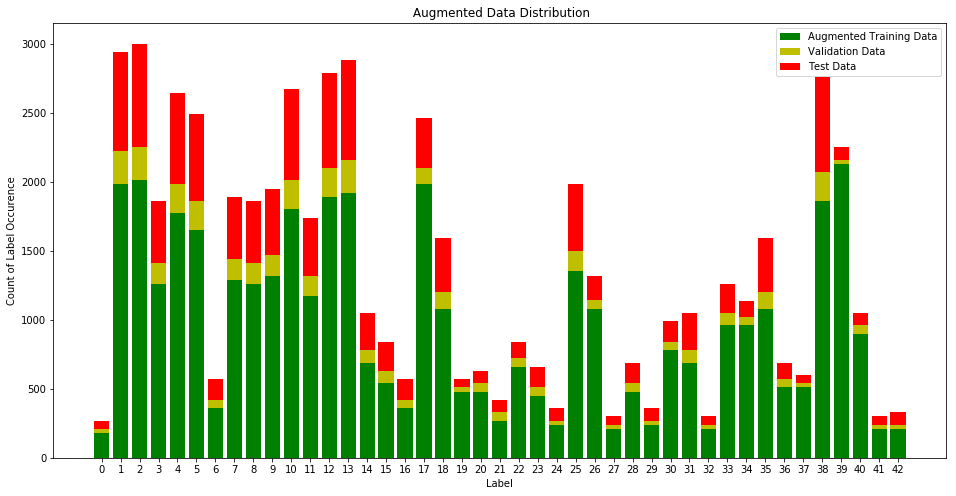

The following 33 labels have less than 1500 training samples and need to be augmented:

[0, 3, 6, 7, 8, 9, 11, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42]
# of images available to be perturbed: 22468
# of images to be created per label {0: 1320, 3: 240, 6: 1140, 7: 210, 8: 240, 9: 180, 11: 330, 14: 810, 15: 960, 16: 1140, 18: 420, 19: 1020, 20: 1020, 21: 1230, 22: 840, 23: 1050, 24: 1260, 25: 150, 26: 420, 27: 1290, 28: 1020, 29: 1260, 30: 720, 31: 810, 32: 1290, 33: 541, 34: 541, 35: 420, 36: 990, 37: 990, 40: 600, 41: 1290, 42: 1290}
Total # of images to be created: 27032


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:07<00:00,  4.74it/s]


The final augmented training set has 68490 images


In [6]:
#Do Preliminary Augmentation on Dataset (i.e. image mirroring and simple rotations)

#Identify which labels can be flipped horizontally/vertically and determine the new label if changed [oldlabel, new label].
#This is not an exhaustive list since not all labels that can be flipped require augmentation

labels_x_flip = np.array([[17,17]])
labels_y_flip = np.array([[19,20], [20,19], [22,22], [26,26], [30,30], [33,34], [34,33], [36,37], [37,36], [38,39]])
labels_rot_120 = np.array([[40,40]])

X_train_aug, y_train_aug = basic_augment(X_train, y_train, labels_x_flip, labels_y_flip, labels_rot_120)

print("Lets visualize the new augmented data set. Some of the lables have been augmented but" 
      " clearly, more augmentation is required:")

#Plot histogram of labels in each set
aug_train_set = Counter(y_train_aug)
valid_set = Counter(y_valid)
test_set = Counter(y_test)

plt.figure(figsize=(16,8))
plt.title(' Augmented Data Distribution')
aug_train_bar = plt.bar(range(len(aug_train_set)), aug_train_set.values(), color = 'g')
valid_bar = plt.bar(range(len(valid_set)), valid_set.values(), color = 'y', bottom = aug_train_set.values())
test_bar = plt.bar(range(len(test_set)), test_set.values(), color = 'r', bottom = (aug_train_set + valid_set).values())

plt.xticks(range(len(aug_train_set)), aug_train_set.keys())
plt.xlabel('Label')
plt.ylabel('Count of Label Occurence')
plt.legend([aug_train_bar, valid_bar, test_bar], ['Augmented Training Data', 'Validation Data', 'Test Data'])
plt.show()

#Identify which labels need to be augmented
labels_to_augment = []
n_threshold = 1500
for key in aug_train_set.keys():
    if(aug_train_set[key] < n_threshold):
        labels_to_augment.append(key)
print("The following {:d} labels have less than {:d} training samples and need to be augmented:\n"
      .format(len(labels_to_augment), n_threshold))
print(labels_to_augment)

#Perform additional augmentation to get under-represented labels in the training set up to the threshold
rt_range = 15
xlate_range = 5
X_train_aug2, y_train_aug2 = augment_set(X_train_aug, y_train_aug, labels_to_augment, 
                                         n_threshold, rt_range, xlate_range)

print("The final augmented training set has {:d} images".format(X_train_aug2.shape[0]))

Let's plot that histogram again...


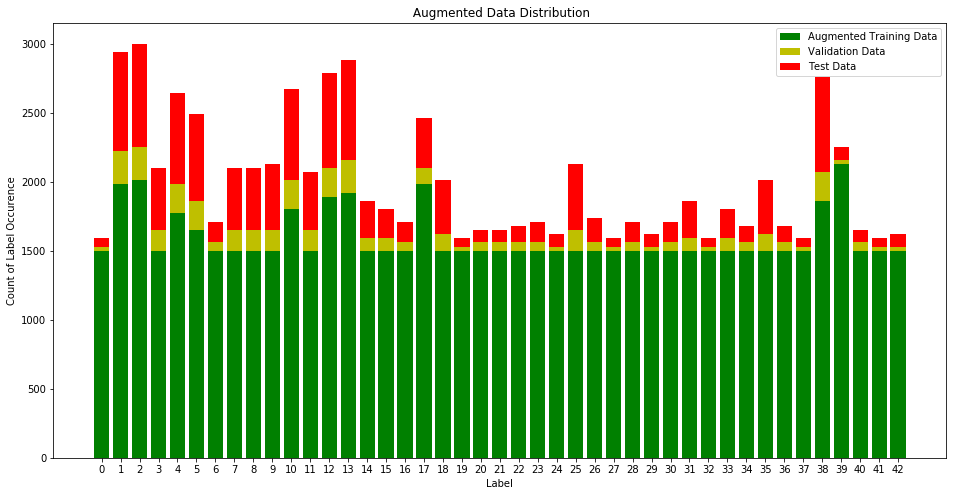

The data distribution is much more balanced. Let's take a look at some of the newly transformed images:


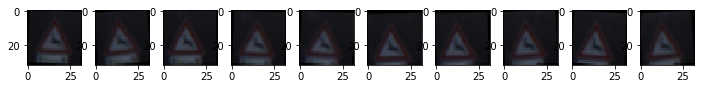

In [7]:
print("Let's plot that histogram again...")

aug_train_set = Counter(y_train_aug2)
valid_set = Counter(y_valid)
test_set = Counter(y_test)

plt.figure(figsize=(16,8))
plt.title(' Augmented Data Distribution')
aug_train_bar = plt.bar(range(len(aug_train_set)), aug_train_set.values(), color = 'g')
valid_bar = plt.bar(range(len(valid_set)), valid_set.values(), color = 'y', bottom = aug_train_set.values())
test_bar = plt.bar(range(len(test_set)), test_set.values(), color = 'r', bottom = (aug_train_set + valid_set).values())

plt.xticks(range(len(aug_train_set)), aug_train_set.keys())
plt.xlabel('Label')
plt.ylabel('Count of Label Occurence')
plt.legend([aug_train_bar, valid_bar, test_bar], ['Augmented Training Data', 'Validation Data', 'Test Data'])
plt.show()


print("The data distribution is much more balanced. Let's take a look at some of the newly transformed images:")
index = random.randint(34799, len(X_train_aug2))
n_images = 10
image = X_train_aug2[index:index+n_images]
image_labels = y_train_aug2[index:index+n_images]
plt.figure(figsize=(12,1))
for i in range(n_images):
    plt.subplot(1,n_images,i+1)
    plt.imshow(image[i])
plt.show()

In [8]:
#Call Pre-Processing functions

#Create equalized grayscale images
X_train_gray = grayscale(X_train_aug2)
X_valid_gray = grayscale(X_valid)
X_test_gray = grayscale(X_test)

X_train_clahe = clahe_equalize(X_train_gray)
X_valid_clahe = clahe_equalize(X_valid_gray)
X_test_clahe = clahe_equalize(X_test_gray)

#Create equalized RGB images
X_train_clahe_RGB = clahe_equalize_RGB(X_train_aug2)
X_valid_clahe_RGB = clahe_equalize_RGB(X_valid)
X_test_clahe_RGB = clahe_equalize_RGB(X_test)

#Merge images
X_train_merge = merge_channels(X_train_clahe, X_train_clahe_RGB)
X_valid_merge = merge_channels(X_valid_clahe, X_valid_clahe_RGB)
X_test_merge = merge_channels(X_test_clahe, X_test_clahe_RGB)

#Compute mean and standard for training set and apply to all splits
#Ref: http://cs231n.github.io/neural-networks-2/
#mean = np.mean(X_train_clahe)
#std = np.std(X_train_clahe)

mean = np.mean(X_train_merge)
std = np.std(X_train_merge)

#Normalize images in each split
X_train_processed = normalize(X_train_merge, mean, std)
X_valid_processed = normalize(X_valid_merge, mean, std)
X_test_processed = normalize(X_test_merge, mean, std)

y_train_processed = y_train_aug2

100%|██████████████████████████████████████████████████████████████████████████| 12630/12630 [00:01<00:00, 7430.45it/s]


Index: 45579
Image Label: 14 - Stop


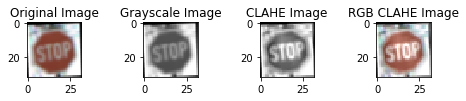

In [9]:
#Check Pre-Processing
index = random.randint(34799, len(X_train_aug2))
image = X_train_aug2[index]
print("Index:", index)
image_gray = X_train_gray[index]
image_processed = X_train_clahe[index]
RGB_enhanced = X_train_clahe_RGB[index]


plt.figure(figsize=(8,1))
plt.subplot(1,4,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1,4,2)
plt.title('Grayscale Image')
plt.imshow(image_gray.squeeze(), cmap = 'gray')
plt.subplot(1,4,3)
plt.title('CLAHE Image')
plt.imshow(image_processed.squeeze(), cmap = 'gray')
plt.subplot(1,4,4)
plt.title('RGB CLAHE Image')
plt.imshow(RGB_enhanced)
print('Image Label:', y_train_aug2[index], "-", traffic_sign_labels[y_train_aug2[index]])


### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#Import all libraries
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import math

In [11]:
#Implement LeNet-5 Architecture - Use LeNet Lab as starting point

def LeNet5(x):
    mu = 0
    sigma = 0.1
    
    #Define Weights & Biases - change depth of wc1 and wc2 from 1,6 - 4,10, 6,16 - 10,20, wd1 from 400 to 500
    weights = {
                'wc1':tf.Variable(tf.truncated_normal([5,5,4,10], mu, sigma)),
                'wc2':tf.Variable(tf.truncated_normal([5,5,10,20], mu, sigma)),
                'wd1':tf.Variable(tf.truncated_normal([500,120], mu, sigma)),
                'wd2':tf.Variable(tf.truncated_normal([120,84], mu, sigma)),
                'wd3':tf.Variable(tf.truncated_normal([84,43], mu, sigma))
    }
    #change bc1 and bc2 from 6,16 to 10,20
    bias = {
                'bc1':tf.Variable(tf.truncated_normal([10], mu, sigma)), 
                'bc2':tf.Variable(tf.truncated_normal([20], mu, sigma)),
                'bd1':tf.Variable(tf.truncated_normal([120], mu, sigma)),
                'bd2':tf.Variable(tf.truncated_normal([84], mu, sigma)),
                'bd3':tf.Variable(tf.truncated_normal([43], mu, sigma))
    }
    
    #Include L2 regularization 
    L2_norm = tf.nn.l2_loss(weights['wc1']) + tf.nn.l2_loss(weights['wc2']) + \
                tf.nn.l2_loss(weights['wd1']) + tf.nn.l2_loss(weights['wd2']) + tf.nn.l2_loss(weights['wd3'])
    
    stride_conv = [1,1,1,1]
    stride_pool = [1,2,2,1]
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6 x10.
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides = stride_conv, padding = 'VALID')
    conv1 = tf.nn.bias_add(conv1, bias['bc1'])

    # Activation. - Use ReLU
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6 x10.
    conv1 = tf.nn.max_pool(conv1, ksize = stride_pool, strides = stride_pool, padding = 'VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16 x20.
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides = stride_conv, padding = 'VALID')
    conv2 = tf.nn.bias_add(conv2, bias['bc2'])
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16 x20. Output = 5x5x16 x20.
    conv2 = tf.nn.max_pool(conv2, ksize = stride_pool, strides = stride_pool, padding = 'VALID')

    # Flatten. Input = 5x5x16. Output = 400 to 500.
    fc1 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400 to 500. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), bias['bd1'])
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), bias['bd2'])
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['wd3']), bias['bd3'])
    
    return logits, L2_norm, conv1, conv2, fc1, fc2
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#Define Variables for model training - change x from depth 1 to 4
x = tf.placeholder(tf.float32, (None, 32, 32, 4))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

#Define hyperparameters
RATE = 0.0005
keep_prob = tf.placeholder(tf.float32)
EPOCHS = 15
BATCH_SIZE = 128
beta = 0.001

#Define Training Pipeline
logits, L2_norm, conv1, conv2, fc1, fc2 = LeNet5(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = RATE)
training_operation = optimizer.minimize(loss_operation + beta*L2_norm)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [13]:
#Accuracy & loss evaluation function
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    n_batches = math.ceil(num_examples/BATCH_SIZE)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    print("Validating & calculating loss...")
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return (total_loss / num_examples, total_accuracy / num_examples)

In [14]:
#Create Session & conduct training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    n_batches = math.ceil(num_examples/BATCH_SIZE)
    
    train_accuracy = []
    valid_accuracy = []
    train_loss = []
    valid_loss = []
    
    print("Training Model...")
    for i in tqdm(range(EPOCHS), total = EPOCHS):
        X_train_processed, y_train_processed = shuffle(X_train_processed, y_train_processed)
        print("Training on batches...")
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_processed[offset:end], y_train_processed[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        #Calculate losses & accuracies
        training_loss, training_accuracy = evaluate(X_train_processed, y_train_processed)
        validation_loss, validation_accuracy = evaluate(X_valid_processed, y_valid)
        train_accuracy.append(training_accuracy*100)
        valid_accuracy.append(validation_accuracy*100)
        train_loss.append(training_loss)
        valid_loss.append(validation_loss)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './LeNet5_Run3')
    print("Training Completed!")

Training Model...


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 1 ...
Training Accuracy = 0.840
Validation Accuracy = 0.807



  7%|█████▍                                                                            | 1/15 [02:39<37:08, 159.21s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 2 ...
Training Accuracy = 0.926
Validation Accuracy = 0.895



 13%|██████████▉                                                                       | 2/15 [04:59<33:16, 153.56s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 3 ...
Training Accuracy = 0.955
Validation Accuracy = 0.921



 20%|████████████████▍                                                                 | 3/15 [07:11<29:25, 147.09s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 4 ...
Training Accuracy = 0.970
Validation Accuracy = 0.936



 27%|█████████████████████▊                                                            | 4/15 [09:27<26:20, 143.67s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 5 ...
Training Accuracy = 0.978
Validation Accuracy = 0.944



 33%|███████████████████████████▎                                                      | 5/15 [11:40<23:26, 140.67s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 6 ...
Training Accuracy = 0.983
Validation Accuracy = 0.957



 40%|████████████████████████████████▊                                                 | 6/15 [13:50<20:37, 137.45s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 7 ...
Training Accuracy = 0.987
Validation Accuracy = 0.959



 47%|██████████████████████████████████████▎                                           | 7/15 [16:03<18:07, 135.90s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 8 ...
Training Accuracy = 0.988
Validation Accuracy = 0.963



 53%|███████████████████████████████████████████▋                                      | 8/15 [18:16<15:45, 135.02s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 9 ...
Training Accuracy = 0.991
Validation Accuracy = 0.964



 60%|█████████████████████████████████████████████████▏                                | 9/15 [20:28<13:25, 134.28s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 10 ...
Training Accuracy = 0.991
Validation Accuracy = 0.966



 67%|██████████████████████████████████████████████████████                           | 10/15 [22:43<11:12, 134.53s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 11 ...
Training Accuracy = 0.993
Validation Accuracy = 0.973



 73%|███████████████████████████████████████████████████████████▍                     | 11/15 [24:56<08:56, 134.10s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 12 ...
Training Accuracy = 0.994
Validation Accuracy = 0.970



 80%|████████████████████████████████████████████████████████████████▊                | 12/15 [27:09<06:40, 133.62s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 13 ...
Training Accuracy = 0.994
Validation Accuracy = 0.970



 87%|██████████████████████████████████████████████████████████████████████▏          | 13/15 [29:21<04:26, 133.15s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 14 ...
Training Accuracy = 0.994
Validation Accuracy = 0.972



 93%|███████████████████████████████████████████████████████████████████████████▌     | 14/15 [31:34<02:13, 133.15s/it]

Training on batches...
Validating & calculating loss...
Validating & calculating loss...
EPOCH 15 ...
Training Accuracy = 0.996
Validation Accuracy = 0.973



100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [33:49<00:00, 133.54s/it]


Training Completed!


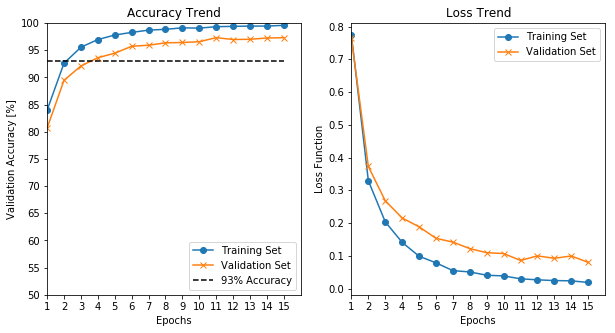

In [15]:
#Plot Validation accuracy
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(range(1,EPOCHS+1), train_accuracy, '-o', label = 'Training Set')
plt.plot(range(1,EPOCHS+1), valid_accuracy, '-x', label = "Validation Set")
plt.plot(range(1,EPOCHS+1), [93]*EPOCHS, '--k', label = '93% Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy [%]')
plt.xlim(1, EPOCHS+1)
plt.ylim(50,100)
plt.xticks(np.arange(1, EPOCHS+1, 1))
plt.yticks(np.arange(50,105,5))
plt.title('Accuracy Trend')
plt.legend(loc = 'lower right')
plt.subplot(1,2,2)
plt.plot(range(1, EPOCHS+1), train_loss, '-o', label = 'Training Set')
plt.plot(range(1, EPOCHS+1), valid_loss, '-x', label = 'Validation Set')
plt.xlabel('Epochs')
plt.ylabel('Loss Function')
plt.xlim(1, EPOCHS+1)
plt.xticks(np.arange(1, EPOCHS+1, 1))
plt.title('Loss Trend')
plt.legend(loc = 'upper right')
plt.show()

In [16]:
#Evaluate test data
with tf.Session() as sess:
    saver.restore(sess, './LeNet5_Run3')
    test_loss, test_accuracy = evaluate(X_test_processed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Validating & calculating loss...
Test Accuracy = 0.964


In [17]:
#Calculate predictions on the test split
test_soft_max = tf.nn.softmax(logits)
top1 = tf.nn.top_k(test_soft_max, 1)
with tf.Session() as sess:
    saver.restore(sess, './LeNet5_Run3')
    test_split_predictions = sess.run(top1, feed_dict={x: X_test_processed, y: y_test, keep_prob: 1})


In [18]:
from sklearn import metrics
test_predictions = test_split_predictions[1]

#Let's calculate precision & recall
precision = metrics.precision_score(y_test, test_predictions, average=None)
recall = metrics.recall_score(y_test, test_predictions, average=None)

print("Traffic Sign Label                                  # of samples Precision    Recall\n")
for i in range(len(traffic_sign_labels)):
    print("{0:<50}: {1:8d} {2:10.2f}% {3:10.2f}%".format(traffic_sign_labels[i],test_set[i], precision[i]*100, recall[i]*100))


Traffic Sign Label                                  # of samples Precision    Recall

Speed limit (20km/h)                              :       60      95.08%      96.67%
Speed limit (30km/h)                              :      720      92.76%      97.92%
Speed limit (50km/h)                              :      750      95.24%      98.67%
Speed limit (60km/h)                              :      450      95.70%      94.00%
Speed limit (70km/h)                              :      660      98.46%      96.67%
Speed limit (80km/h)                              :      630      94.92%      89.05%
End of speed limit (80km/h)                       :      150      98.63%      96.00%
Speed limit (100km/h)                             :      450      95.46%      98.22%
Speed limit (120km/h)                             :      450      97.70%      94.22%
No passing                                        :      480      99.38%     100.00%
No passing for vehicles over 3.5 metric tons      :      660    

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

The test images array is: (13, 32, 32, 3)
The test labels array is: (13,)
Let's take a look at all the resized images and their labels:


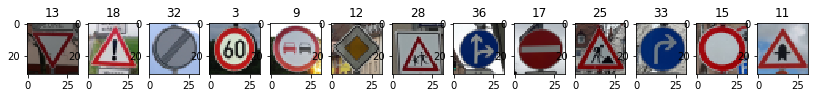

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import re
from glob import glob

#Import images
test_images = np.empty([13,32,32,3], dtype = np.uint8)
test_labels = np.empty([13], dtype = int)

for i, filename in enumerate(glob('Images\*.jpg')):
    image = mpimg.imread(filename)
    image = cv2.resize(image, (32,32), interpolation=cv2.INTER_AREA)
    test_images[i] = image
    test_labels[i] = re.findall(r'\d+', filename)[1]

print("The test images array is:", test_images.shape)
print("The test labels array is:", test_labels.shape)
print("Let's take a look at all the resized images and their labels:")

plt.figure(figsize=(14,2))
for i in range(test_images.shape[0]):
    plt.subplot(1,test_images.shape[0],i+1)
    plt.imshow(test_images[i])
    plt.title("{:d}".format(test_labels[i]))
plt.show()




### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#Process the images
test_images_gray = grayscale(test_images)
test_images_clahe = clahe_equalize(test_images_gray)
test_images_clahe_RGB = clahe_equalize_RGB(test_images)
test_images_merge = merge_channels(test_images_clahe, test_images_clahe_RGB)

mean_test = np.mean(test_images_merge)
std_test = np.std(test_images_merge)

test_images_processed = normalize(test_images_merge, mean_test, std_test)

100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1446.58it/s]


In [21]:
#Calculate predictions
soft_max = tf.nn.softmax(logits)
top5 = tf.nn.top_k(soft_max, 5)

with tf.Session() as sess:
    saver.restore(sess, './LeNet5_Run3')
    predictions = sess.run(top5, feed_dict={x: test_images_processed, y: test_labels, keep_prob: 1})


### Analyze Performance

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, './LeNet5_Run3')
    test_images_loss, test_images_accuracy = evaluate(test_images_processed, test_labels)
    print("Test Image Accuracy = {:.3f}".format(test_images_accuracy))

Validating & calculating loss...
Test Image Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Let's visualize the predictions instead of printing them.
On the left is the probability of each top-5 label. The title of the barchart represents the prediction.
On the right is the actual sign and label


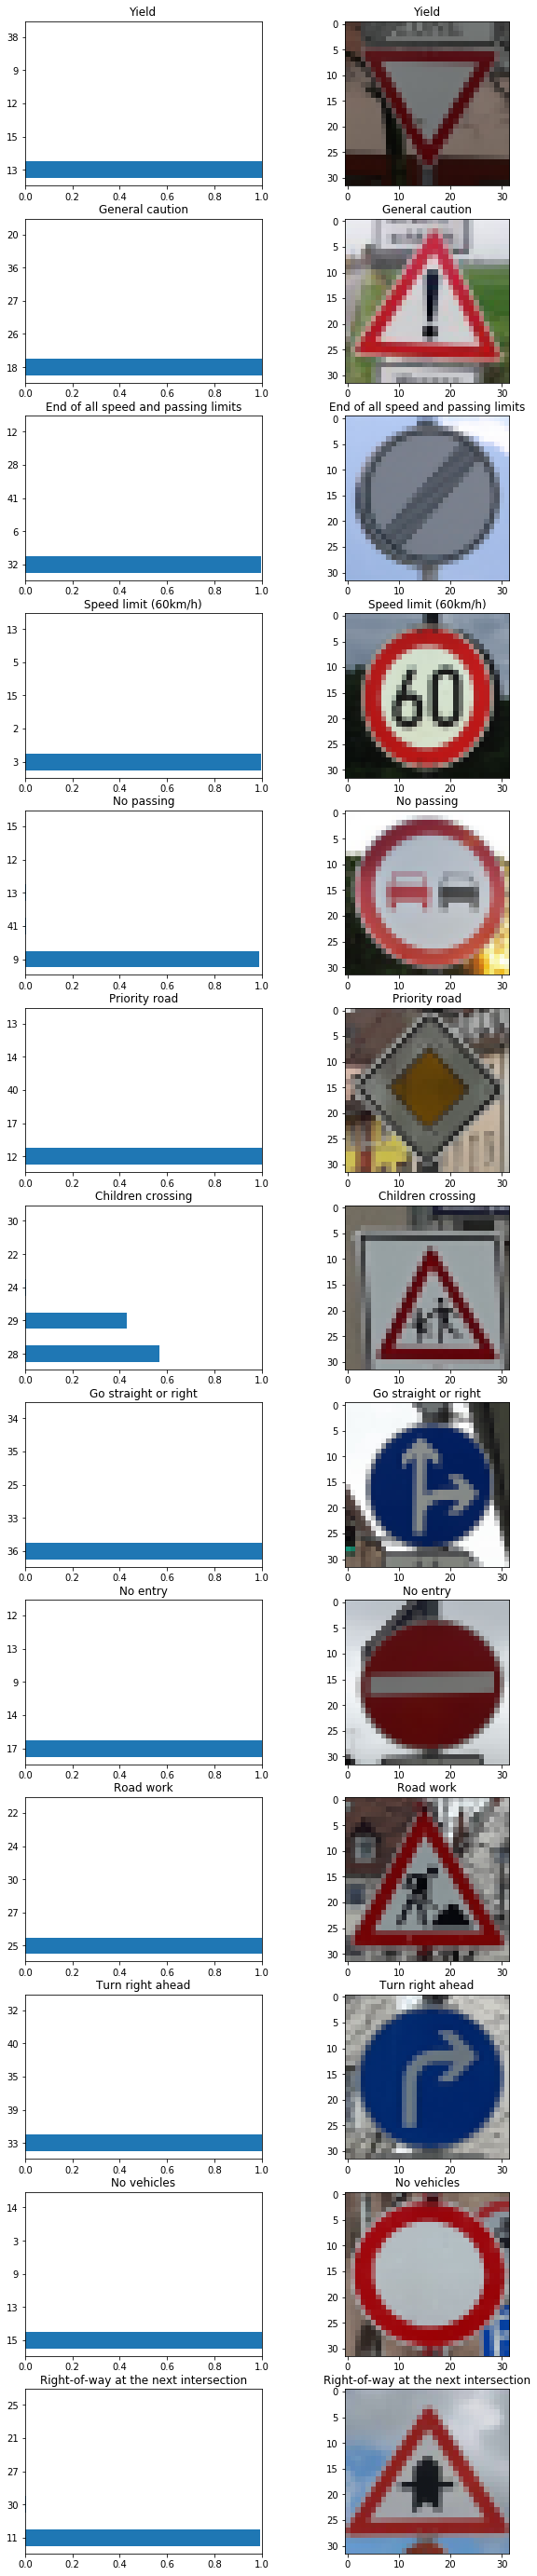

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

prob_predict, label_predict = predictions[0], predictions[1]

print("Let's visualize the predictions instead of printing them.")
print("On the left is the probability of each top-5 label. The title of the barchart represents the prediction.")
print("On the right is the actual sign and label")
fig = plt.figure(figsize=(10,50))
for i in range(13):
    ax = plt.subplot(13,2,2*i+1)
    plt.barh(range(5), prob_predict[i], height = 0.5)
    ax.set_yticks(range(5))
    ax.set_xlim([0,1])
    ax.set_yticklabels(label_predict[i])
    plt.title("{}".format(traffic_sign_labels[label_predict[i,0]]))
    plt.subplot(13,2,2*i+2)
    plt.imshow(test_images[i])
    plt.title(traffic_sign_labels[test_labels[i]])
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [60]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob: 1})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Let's take a look at an unprocessed image


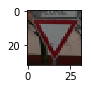

In [61]:
print("Let's take a look at an unprocessed image")
plt.figure(figsize=(1,1))
plt.imshow(test_images[0])
plt.show()
#Re-shape processed image to (1,32,32,4)
image_input = np.expand_dims(test_images_processed[0], 0)

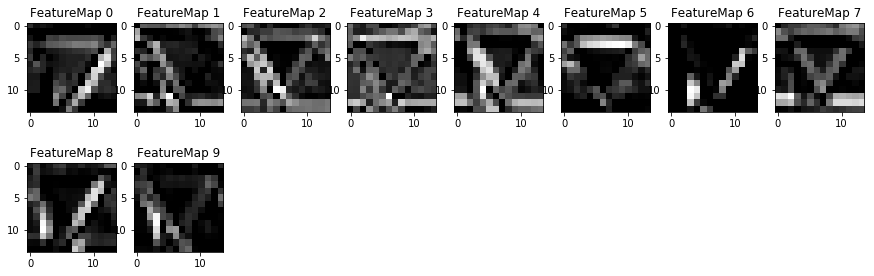

In [64]:
#Visualize feature maps for 1st conv layer. Depth is 10.
with tf.Session() as sess:
    saver.restore(sess, './LeNet5_Run3')
    outputFeatureMap(image_input, conv1)

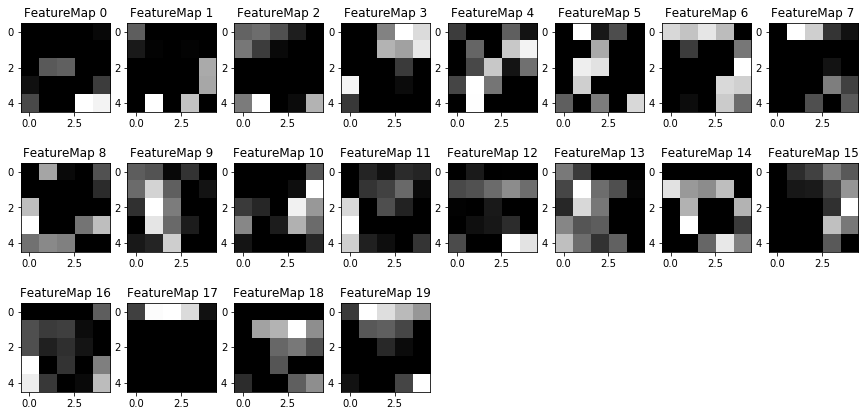

In [65]:
#Visualize feature maps for 2nd conv layer. Depth is 20.
with tf.Session() as sess:
    saver.restore(sess, './LeNet5_Run3')
    outputFeatureMap(image_input, conv2)